## Data:
--> price : price in US dollars (\$326--\$18,823)

--> carat : weight of the diamond (0.2--5.01)

--> cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

--> color : diamond colour, from J (worst) to D (best)

--> clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

--> x : length in mm (0--10.74)

--> y : width in mm (0--58.9)

--> z : depth in mm (0--31.8)

--> depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

--> table : width of top of diamond relative to widest point (43--95)

## Importing Libraries & getting Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('dataset\diamonds.csv')

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
data.drop(['Unnamed: 0'], axis=1 ,inplace=True)

In [6]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Dropping Rows with Dimensions 'Zero' (x,y,z can't be zero as length)

In [8]:
data.loc[(data['x'] == 0) |(data['y'] == 0) |(data['z'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [9]:
print('Number of columns with dimensions 0 : {}'.format(len(data[(data['x'] == 0) | (data['y'] == 0) | (data['z'] == 0)])))

Number of columns with dimensions 0 : 20


In [10]:
# dropping the zero dimensions columns 
data = data[(data[['x','y','z']] != 0).all(axis=1)]
data.loc[(data['x'] == 0) | (data['y'] == 0) | (data['z'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


## Scaling

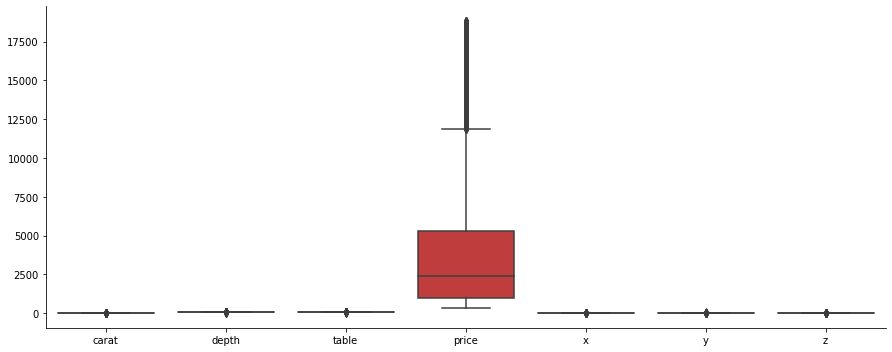

In [11]:
sns.catplot(data=data ,kind='box',aspect=2.5)

## Correlation

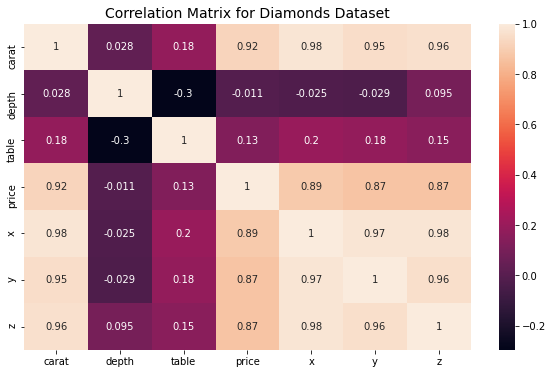

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr() ,annot=True)
plt.title('Correlation Matrix for Diamonds Dataset',size=14)
plt.show()

In [13]:
data.corr()['price'].sort_values(ascending=False)

price    1.000000
carat    0.921592
x        0.887231
z        0.868206
y        0.867864
table    0.127245
depth   -0.010729
Name: price, dtype: float64

# EDA

## Analysing Carat (weight of the diamond)

In [14]:
# carat is positively skewed (as mean > median)
data.carat.describe()

count    53920.000000
mean         0.797698
std          0.473795
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

<Figure size 576x288 with 0 Axes>

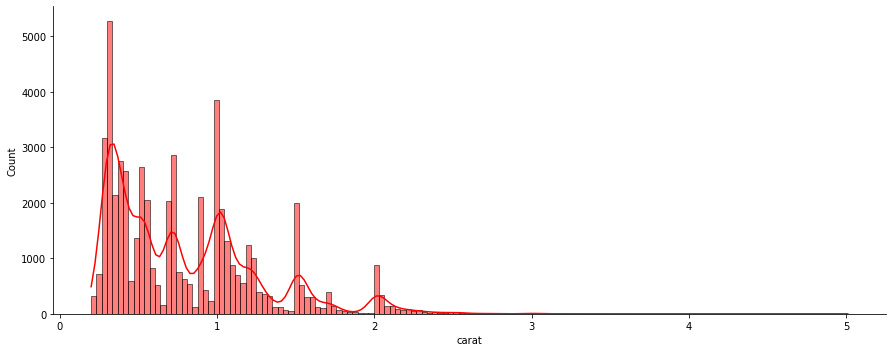

In [15]:
plt.figure(figsize=(8,4))
sns.displot(data['carat'] ,kde=True,color='r',aspect=2.5)
plt.show()

### Carat vs Price

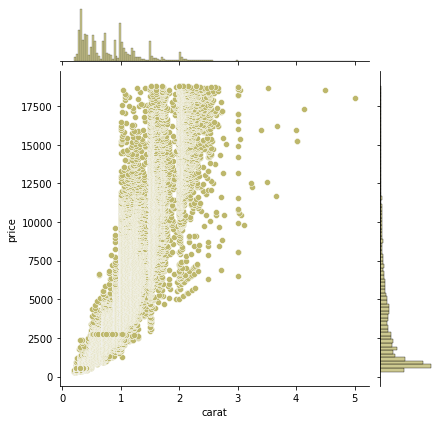

In [16]:
sns.jointplot(x='carat' ,y='price' ,data=data ,color='darkkhaki')

## Analysing Cut

In [17]:
data.cut.value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

<AxesSubplot:xlabel='cut', ylabel='count'>

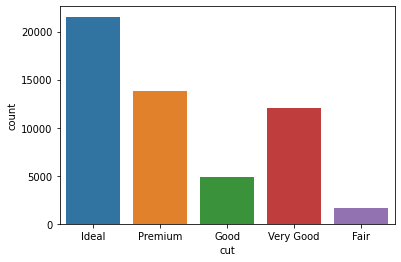

In [18]:
sns.countplot(x='cut',data=data)

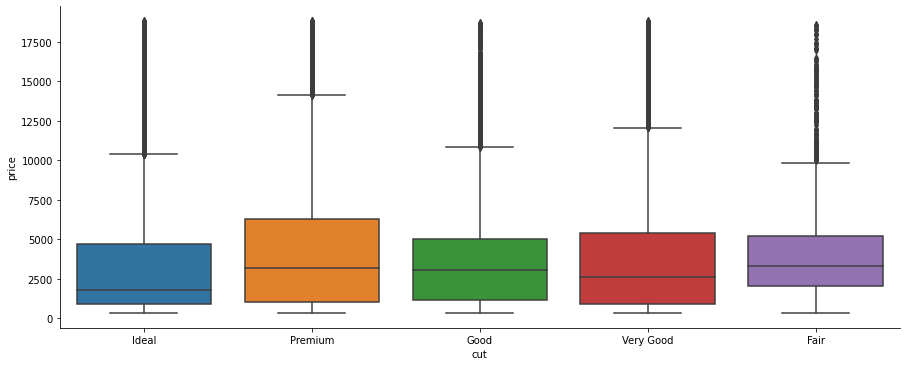

In [19]:
sns.catplot(x='cut' ,y='price',data=data,kind='box',aspect=2.5)

## Analysing Color

In [20]:
data.color.value_counts()

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

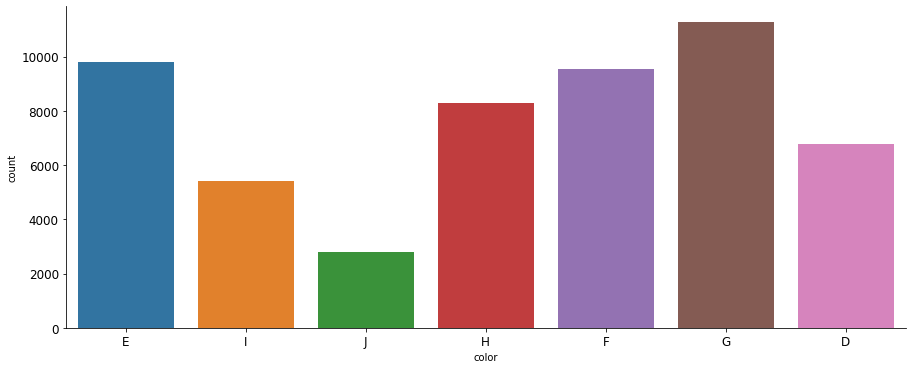

In [21]:
sns.catplot(x='color', data=data,kind='count',aspect=2.5)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

### Color vs Price

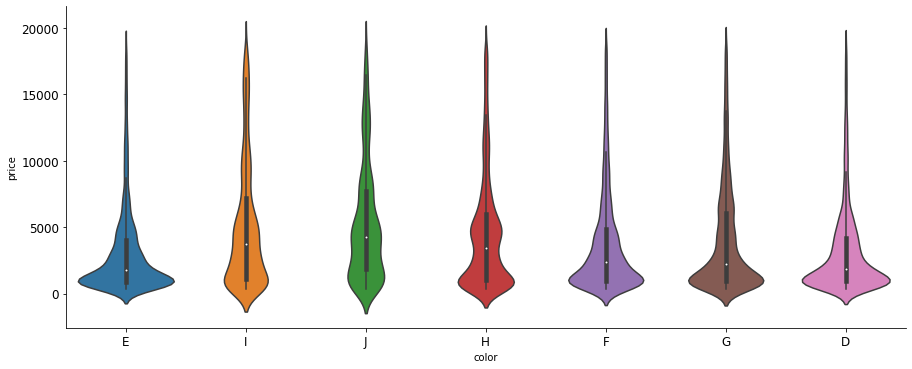

In [22]:
sns.catplot(x='color' ,y='price' ,data=data ,kind='violin' ,aspect=2.5)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

## Analysing Clarity (absence of the Inclusions and Blemishes)

In [23]:
data.clarity.value_counts()

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

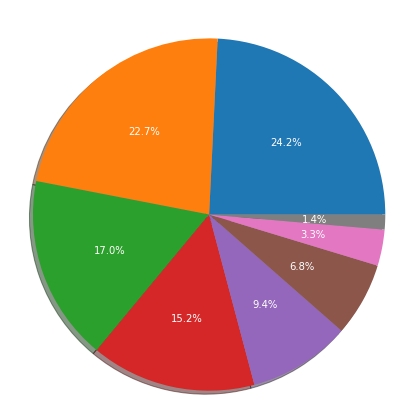

In [24]:
labels = data.clarity.unique().tolist()
counts = data.clarity.value_counts().tolist()

plt.figure(figsize=(7,7))
plt.title('Pie-Chart of Clarity Categories',size=16 ,color='w')
plt.pie(counts ,labels=labels ,autopct='%1.1f%%' ,shadow=True ,textprops={'color':'w'})
plt.axis('equal')

plt.show()

### Clarity vs Price

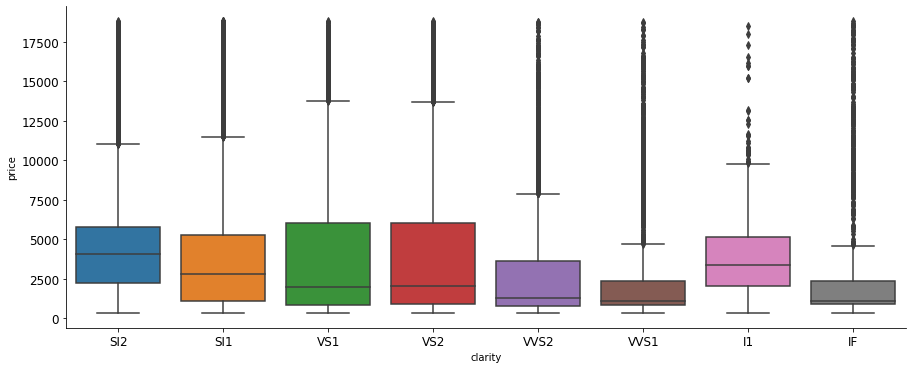

In [25]:
sns.catplot(x='clarity' ,y='price' ,data=data ,kind='box',aspect=2.5)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

## Analysing Depth

<AxesSubplot:xlabel='depth', ylabel='Count'>

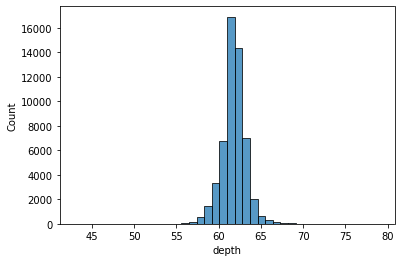

In [26]:
sns.histplot(data=data ,x='depth',bins=40)

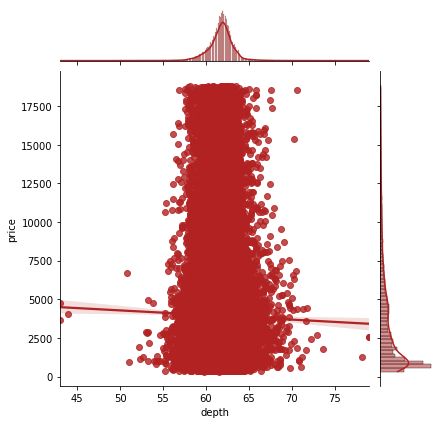

In [27]:
sns.jointplot(x='depth' ,y='price' , data=data ,kind='reg' ,color='firebrick')

## Analysing Table

<AxesSubplot:xlabel='table', ylabel='Density'>

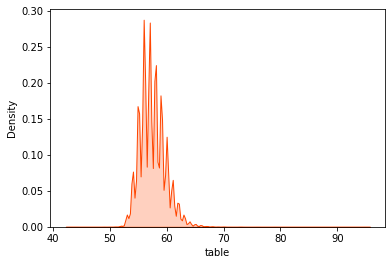

In [28]:
sns.kdeplot(data['table'] ,shade=True ,color='orangered')

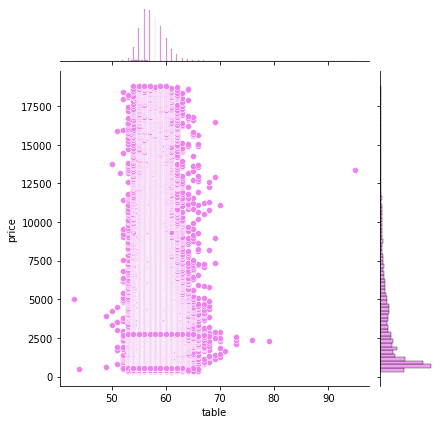

In [29]:
sns.jointplot(x='table' ,y='price' ,data=data ,color='violet')

## Analysing Dimensions (i.e x,y,z)

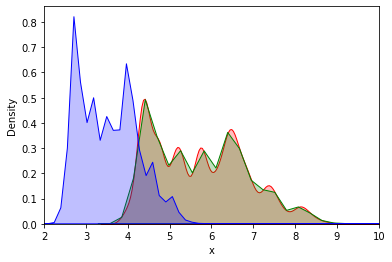

In [30]:
sns.kdeplot(data['x'], shade=True, color='r')
sns.kdeplot(data['y'], shade=True, color='g')
sns.kdeplot(data['z'], shade=True, color='b')
plt.xlim(2, 10)
plt.show()

# Feature Engineering / Encoding

## Creating New Features

In [31]:
data['volume'] = data['x']*data['y']*data['z']
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


(0.0, 50000.0)

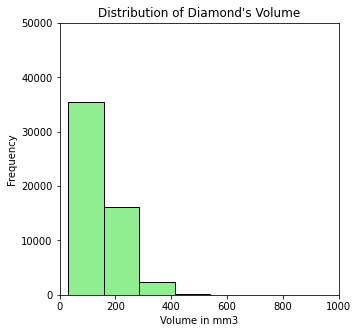

In [32]:
plt.figure(figsize=(5, 5))
plt.hist(x=data['volume'], bins=30, color='lightgreen',ec='black')

plt.xlabel('Volume in mm3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond\'s Volume')
plt.xlim(0, 1000)
plt.ylim(0, 50000)


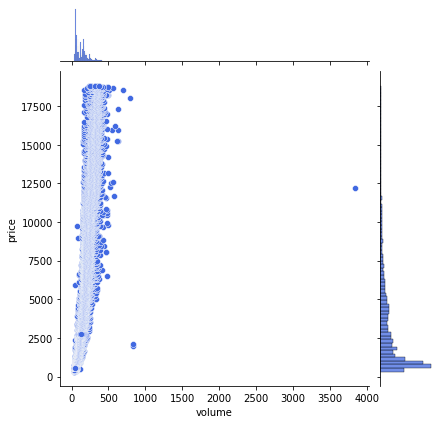

In [33]:
sns.jointplot(x='volume', y='price' , data=data, color='royalblue')

In [34]:
data.drop(['x','y','z'],axis=1 ,inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [35]:
data.select_dtypes(exclude=[np.number]).columns.tolist()

['cut', 'color', 'clarity']

In [36]:
from sklearn.preprocessing import LabelEncoder

label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()

data['cut'] = label_cut.fit_transform(data['cut'])
data['color'] = label_color.fit_transform(data['color'])
data['clarity'] = label_clarity.fit_transform(data['clarity'])

# Feature Scaling

In [37]:
X = data.drop(['price'], axis=1)
y = data['price']
X.shape ,y.shape

((53920, 7), (53920,))

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [39]:
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape

((43136, 7), (10784, 7), (43136,), (10784,))

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models

In [41]:
# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Metrics 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score

In [42]:
r2_scores = []
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'AdaBoost Regression','GradientBoosting Regression', 'RandomForest Regression', 'RandomForest Regression Tuned', 'KNeighbours Regression','KNeighbours Regression Tuned']


## Linear Regression 

In [43]:
lr_model = LinearRegression()
lr_model.fit(X_train ,y_train)
accuracies = cross_val_score(estimator=lr_model ,X=X_train ,y=y_train ,cv=5,verbose=1)

y_pred_lr = lr_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [44]:
print('Model : Linear Regression')
print('Accuracy : %.4f'%lr_model.score(X_test ,y_test))

mse_lr = mean_squared_error(y_test ,y_pred_lr)
mae_lr = mean_absolute_error(y_test ,y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr)**0.5
r2_lr = r2_score(y_test, y_pred_lr)

print('')
print('MSE    : %0.2f ' % mse_lr)
print('MAE    : %0.2f ' % mae_lr)
print('RMSE   : %0.2f ' % rmse_lr)
print('R2     : %0.4f ' % r2_lr)

r2_scores.append(r2_lr)


Model : Linear Regression
Accuracy : 0.8866

MSE    : 1818420.48 
MAE    : 922.17 
RMSE   : 1348.49 
R2     : 0.8866 


## Lasso Regression

In [45]:
lasso_model = Lasso(normalize=True)
lasso_model.fit(X_train, y_train)
accuracies = cross_val_score(
    estimator=lasso_model, X=X_train, y=y_train, cv=5, verbose=1)

y_pred_lasso = lasso_model.predict(X_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished


In [46]:
print('Model : Lasso Regression')
print('Accuracy : %.4f' % lasso_model.score(X_test, y_test))

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso)**0.5
r2_lasso = r2_score(y_test, y_pred_lasso)

print('')
print('MSE    : %0.2f ' % mse_lasso)
print('MAE    : %0.2f ' % mae_lasso)
print('RMSE   : %0.2f ' % rmse_lasso)
print('R2     : %0.4f ' % r2_lasso)

r2_scores.append(r2_lasso)


Model : Lasso Regression
Accuracy : 0.8701

MSE    : 2082032.91 
MAE    : 910.29 
RMSE   : 1442.93 
R2     : 0.8701 


## Ridge Regression

In [47]:
ridge_model = Ridge(normalize=True)
ridge_model.fit(X_train, y_train)
accuracies = cross_val_score(
    estimator=ridge_model, X=X_train, y=y_train, cv=5, verbose=1)

y_pred_ridge = ridge_model.predict(X_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [48]:
print('Model : Ridge Regression')
print('Accuracy : %.4f' % ridge_model.score(X_test, y_test))

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge)**0.5
r2_ridge = r2_score(y_test ,y_pred_ridge)

print('')
print('MSE    : %0.2f ' % mse_ridge)
print('MAE    : %0.2f ' % mae_ridge)
print('RMSE   : %0.2f ' % rmse_ridge)
print('R2     : %0.4f ' % r2_ridge)

r2_scores.append(r2_ridge)

Model : Ridge Regression
Accuracy : 0.7552

MSE    : 3924497.90 
MAE    : 1337.76 
RMSE   : 1981.03 
R2     : 0.7552 


## AdaBoost Regression 

In [49]:
ada_model = AdaBoostRegressor(n_estimators=1000)
ada_model.fit(X_train, y_train)
accuracies = cross_val_score(
    estimator=ada_model, X=X_train, y=y_train, cv=5, verbose=1)

y_pred_ada = ada_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   33.2s finished


In [50]:
print('Model : AdaBoost Regression')
print('Accuracy : %.4f' % ada_model.score(X_test, y_test))

mse_ada = mean_squared_error(y_test, y_pred_ada)
mae_ada = mean_absolute_error(y_test, y_pred_ada)
rmse_ada = mean_squared_error(y_test, y_pred_ada)**0.5
r2_ada = r2_score(y_test, y_pred_ada)

print('')
print('MSE    : %0.2f ' % mse_ada)
print('MAE    : %0.2f ' % mae_ada)
print('RMSE   : %0.2f ' % rmse_ada)
print('R2     : %0.4f ' % r2_ada)

r2_scores.append(r2_ada)


Model : AdaBoost Regression
Accuracy : 0.8705

MSE    : 2076683.64 
MAE    : 1151.87 
RMSE   : 1441.07 
R2     : 0.8705 


## Gradient Regression

In [51]:
grad_model = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls', verbose=1)
grad_model.fit(X_train, y_train)
accuracies = cross_val_score(
    estimator=grad_model, X=X_train, y=y_train, cv=5, verbose=1)

y_pred_grad = grad_model.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1    14022317.9088            4.16s
         2    12447359.4352            3.82s
         3    11123139.8458            3.88s
         4     9953833.2589            3.82s
         5     8983122.8611            3.90s
         6     8115302.9599            3.85s
         7     7387342.0874            3.76s
         8     6756837.6213            3.60s
         9     6198309.0657            3.55s
        10     5728201.4784            3.55s
        20     3208390.3319            3.04s
        30     2403892.1045            2.76s
        40     2111903.1805            2.32s
        50     1932438.5590            1.90s
        60     1797486.2019            1.49s
        70     1693925.7951            1.06s
        80     1614934.2982            0.69s
        90     1553315.4163            0.35s
       100     1504693.1428            0.00s
      Iter       Train Loss   Remaining Time 
         1    14158503.8395            3.17s
        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



         7     7443505.8739            2.87s
         8     6805614.3022            2.90s
         9     6245360.0366            2.87s
        10     5770135.8636            2.85s
        20     3235705.9140            2.46s
        30     2428314.9703            2.20s
        40     2136266.3024            1.87s
        50     1956186.0993            1.56s
        60     1821569.8155            1.26s
        70     1718123.9415            0.96s
        80     1638666.3593            0.64s
        90     1576603.9962            0.32s
       100     1527840.2789            0.00s
      Iter       Train Loss   Remaining Time 
         1    14004612.8925            2.87s
         2    12429662.0581            2.89s
         3    11107806.3453            3.07s
         4     9937308.4427            3.00s
         5     8966699.1721            3.12s
         6     8098885.6422            3.09s
         7     7376243.6432            3.02s
         8     6748395.2988            3.01s
        

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.0s finished


In [52]:
print('Model : Gradient Boosting Regression')
print('Accuracy : %.4f' % grad_model.score(X_test, y_test))

mse_grad = mean_squared_error(y_test, y_pred_grad)
mae_grad = mean_absolute_error(y_test, y_pred_grad)
rmse_grad = mean_squared_error(y_test, y_pred_grad)**0.5
r2_grad = r2_score(y_test, y_pred_grad)

print('')
print('MSE    : %0.2f ' % mse_grad)
print('MAE    : %0.2f ' % mae_grad)
print('RMSE   : %0.2f ' % rmse_grad)
print('R2     : %0.4f ' % r2_grad)

r2_scores.append(r2_grad)


Model : Gradient Boosting Regression
Accuracy : 0.9075

MSE    : 1482348.15 
MAE    : 723.92 
RMSE   : 1217.52 
R2     : 0.9075 


## Random Forest Regression

In [53]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
accuracies = cross_val_score(
    estimator=rf_model, X=X_train, y=y_train, cv=5, verbose=1)

y_pred_rf = rf_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.3min finished


In [54]:
print('Model : RandomForest Regression')
print('Accuracy : %.4f' % rf_model.score(X_test, y_test))

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf)**0.5
r2_rf = r2_score(y_test, y_pred_rf)

print('')
print('MSE    : %0.2f ' % mse_rf)
print('MAE    : %0.2f ' % mae_rf)
print('RMSE   : %0.2f ' % rmse_rf)
print('R2     : %0.4f ' % r2_rf)

r2_scores.append(r2_rf)


Model : RandomForest Regression
Accuracy : 0.9801

MSE    : 318898.81 
MAE    : 276.53 
RMSE   : 564.71 
R2     : 0.9801 


### HyperParameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

no_of_test = [100]
params_dict = {'n_estimators': no_of_test,'n_jobs': [-1], 'max_features': ["auto", 'sqrt', 'log2']}

rf_model_tuned = GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict, scoring='r2')
rf_model_tuned.fit(X_train, y_train)

print('Accuracy : %.4f' % rf_model_tuned.score(X_test, y_test))
y_pred_rf_tuned = rf_model_tuned.predict(X_test)

r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
print('R2     : %0.4f ' % r2_rf_tuned)
r2_scores.append(r2_rf_tuned)


exception calling callback for <Future at 0x2246f3f3610 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\91959\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\91959\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\91959\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py", line 792, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\91959\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\91959\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users

Accuracy : 0.9804
R2     : 0.9804 


## KNeighbors Regression

In [56]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
accuracies = cross_val_score(
    estimator=knn_model, X=X_train, y=y_train, cv=5, verbose=1)

y_pred_knn = knn_model.predict(X_test)
print('Model : KNeighbors Regression')
print('Accuracy : %.4f' % knn_model.score(X_test, y_test))

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn)**0.5
r2_knn = r2_score(y_test, y_pred_knn)

print('')
print('MSE    : %0.2f ' % mse_knn)
print('MAE    : %0.2f ' % mae_knn)
print('RMSE   : %0.2f ' % rmse_knn)
print('R2     : %0.2f ' % r2_knn)

r2_scores.append(r2_knn)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.2s finished


Model : KNeighbors Regression
Accuracy : 0.9573

MSE    : 684719.26 
MAE    : 434.37 
RMSE   : 827.48 
R2     : 0.96 


### Hyperparameter Tuning

In [57]:
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)

params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
knn_model_tuned = GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='r2')
knn_model_tuned.fit(X_train,y_train)

print('Accuracy : %.4f' % knn_model_tuned.score(X_test, y_test))
y_pred_knn_tuned=knn_model_tuned.predict(X_test)

r2_knn_tuned = r2_score(y_test, y_pred_knn_tuned)
print('R2     : %0.2f ' % r2_knn_tuned)
r2_scores.append(r2_knn_tuned)

C:\Users\91959\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91959\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\91959\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\91959\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\91959\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(est

Accuracy : 0.9573
R2     : 0.96 


# Model evaluation

In [58]:
r2_scores

[0.8865752211512743,
 0.8701322798228307,
 0.7552077142543778,
 0.870465943064497,
 0.9075378807111539,
 0.9801085460874215,
 0.9803974739280071,
 0.9572903346781003,
 0.9572903346781003]

In [59]:
regModels = pd.DataFrame({'Regression Model': models, 'R2-Scores': r2_scores})
regModels.sort_values(by='R2-Scores', ascending=False)


,Regression Model,R2-Scores
6,RandomForest Regression Tuned,0.980397
5,RandomForest Regression,0.980109
7,KNeighbours Regression,0.957290
8,KNeighbours Regression Tuned,0.957290
4,GradientBoosting Regression,0.907538
0,Linear Regression,0.886575
3,AdaBoost Regression,0.870466
1,Lasso Regression,0.870132
2,Ridge Regression,0.755208


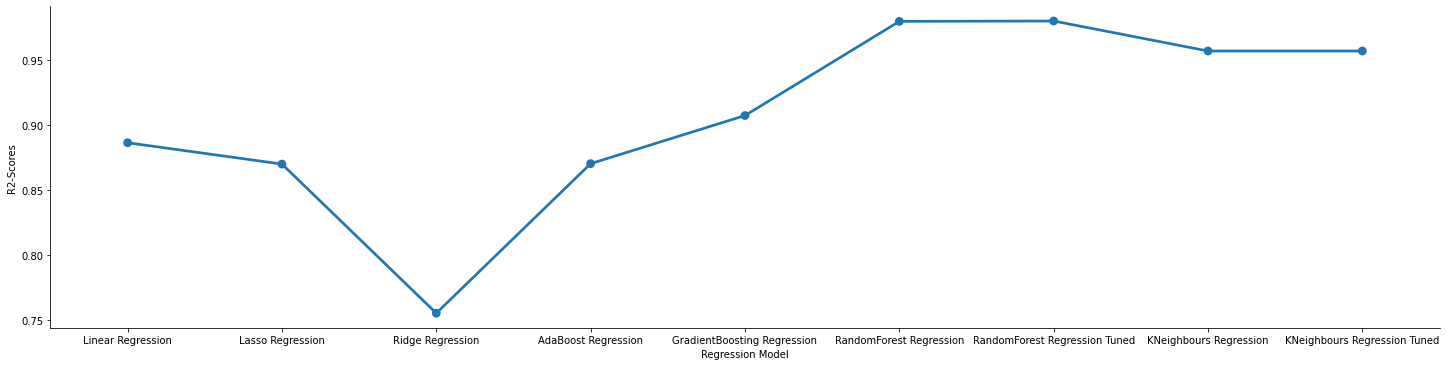

In [60]:
sns.catplot(x='Regression Model', y='R2-Scores' ,data=regModels ,aspect=4,kind='point')